# Week4 - HW 2

## Due Wednesday before class

### 1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand) for at least 10 days and not more than 40 days. 

In [50]:
import pandas as pd

path = '/mnt/c/Users/}{/Documents/UMBC FALL 2021/DATA_601/DS601_Fall21/Week04/homework/RollingSystemDemand_20210929_1605.xml'
df = pd.read_xml(path,  xpath="/response/responseBody/responseList/item")
df

,recordType,settDate,publishingPeriodCommencingTime,fuelTypeGeneration,activeFlag
0,VD,2021-09-18,00:00:00,22178,Y
1,VD,2021-09-18,00:05:00,22378,Y
2,VD,2021-09-18,00:10:00,22380,Y
3,VD,2021-09-18,00:15:00,22362,Y
4,VD,2021-09-18,00:20:00,22435,Y
...,...,...,...,...,...
3163,VD,2021-09-28,23:35:00,22000,Y
3164,VD,2021-09-28,23:40:00,21917,Y
3165,VD,2021-09-28,23:45:00,21772,Y
3166,VD,2021-09-28,23:50:00,21663,Y


In [51]:
3168/12

264.0

In [52]:
# accidently pulled 11 days only want ten
df = df.iloc[:-288]
df

,recordType,settDate,publishingPeriodCommencingTime,fuelTypeGeneration,activeFlag
0,VD,2021-09-18,00:00:00,22178,Y
1,VD,2021-09-18,00:05:00,22378,Y
2,VD,2021-09-18,00:10:00,22380,Y
3,VD,2021-09-18,00:15:00,22362,Y
4,VD,2021-09-18,00:20:00,22435,Y
...,...,...,...,...,...
2875,VD,2021-09-27,23:35:00,21632,Y
2876,VD,2021-09-27,23:40:00,21455,Y
2877,VD,2021-09-27,23:45:00,21271,Y
2878,VD,2021-09-27,23:50:00,21101,Y


### 2. Create two bar graphs of the power consumption per hour. 
    a. One bar graph has 24 bars; 
    b. one bar graph has 24 times number of days bars.

In [53]:
# to make the first bar graph I only want to display 24 bars. the data presently shows every 5 min
# I want to display the data so that it only displays the mean for each hour.
# then I will take the mean of every hour across all days
# finally I will show the avg power consumed every hour for a 10 day period.

df['fuelTypeGeneration'][0:12].mean()

df2 = pd.DataFrame(columns=['recordType','settDate','publishingPeriodCommencingTime','fuelTypeGeneration','activeFlag'])
for i in range(0,df.shape[0],12):
    df2 = df2.append({'recordType' : df['recordType'][i],
                    'settDate':df['settDate'][i],
                    'publishingPeriodCommencingTime':df['publishingPeriodCommencingTime'][i],
                    'fuelTypeGeneration': df['fuelTypeGeneration'][i:i+12].mean(),
                    'activeFlag': df['recordType'][i]}, 
                    ignore_index=True)
    # ,fuelTypeGeneration:df['fuelTypeGeneration'][0:12].mean()

In [54]:
df2

,recordType,settDate,publishingPeriodCommencingTime,fuelTypeGeneration,activeFlag
0,VD,2021-09-18,00:00:00,22361.416667,VD
1,VD,2021-09-18,01:00:00,21862.333333,VD
2,VD,2021-09-18,02:00:00,21328.500000,VD
3,VD,2021-09-18,03:00:00,21034.416667,VD
4,VD,2021-09-18,04:00:00,20990.666667,VD
...,...,...,...,...,...
235,VD,2021-09-27,19:00:00,31865.750000,VD
236,VD,2021-09-27,20:00:00,28951.416667,VD
237,VD,2021-09-27,21:00:00,26022.583333,VD
238,VD,2021-09-27,22:00:00,23429.583333,VD


In [69]:
# print(df2.sort_values('publishingPeriodCommencingTime'))
# print(df2.groupby('publishingPeriodCommencingTime').mean())

df_alldays_hour = df2.groupby('publishingPeriodCommencingTime').mean().reset_index()
df_alldays_hour

,publishingPeriodCommencingTime,fuelTypeGeneration
0,00:00:00,20980.708333
1,01:00:00,20596.700000
2,02:00:00,20289.325000
3,03:00:00,20184.716667
4,04:00:00,20598.141667
5,05:00:00,22967.200000
6,06:00:00,26233.550000
7,07:00:00,28040.408333
8,08:00:00,28412.008333
9,09:00:00,27895.791667


In [56]:
import matplotlib.pyplot as plt


## Bar graph with 24 bars

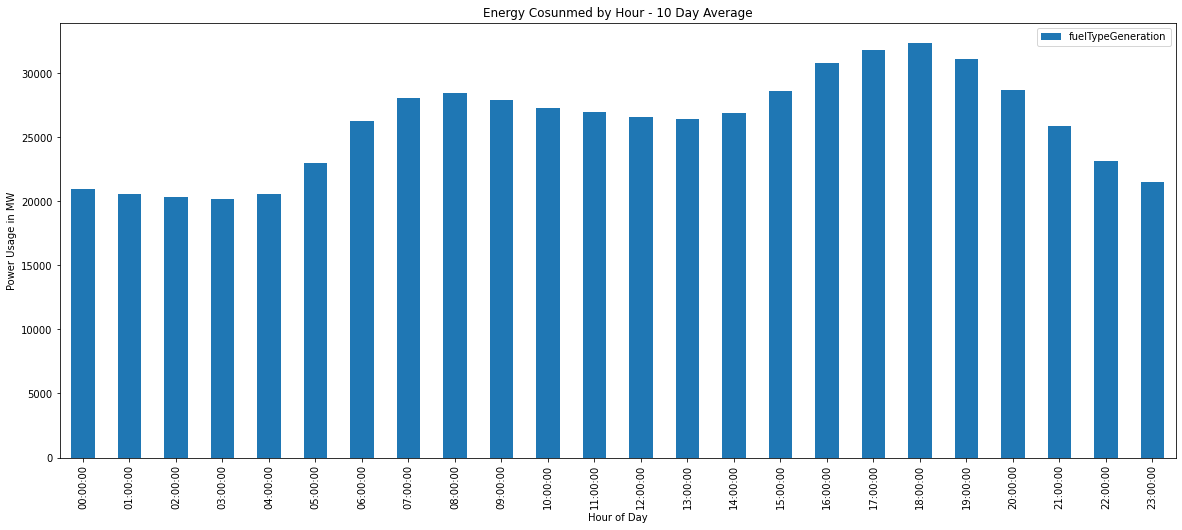

In [100]:
df_alldays_hour.plot.bar(x=0, 
                        xlabel='Hour of Day',
                        ylabel='Power Usage in MW', 
                        title='Energy Cosunmed by Hour - 10 Day Average', 
                        figsize=(20, 8));

### Bar graph with 240 (24*10) bars

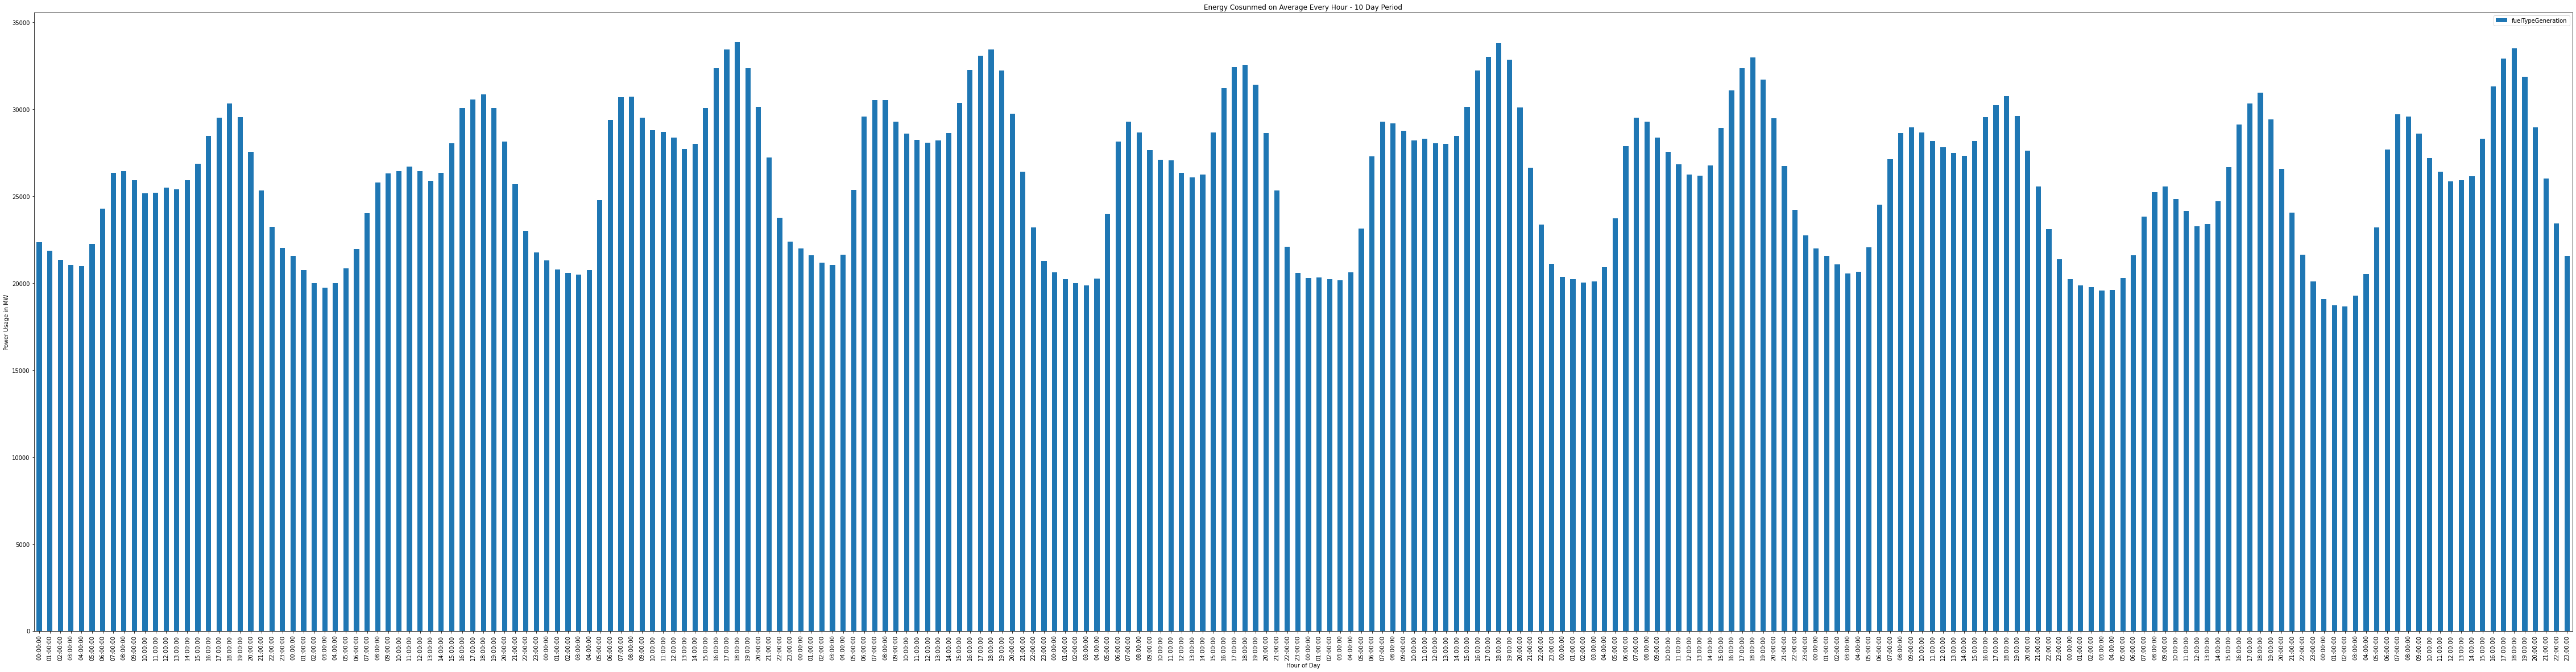

In [112]:
df2[['publishingPeriodCommencingTime',	'fuelTypeGeneration']].plot.bar(x=0, 
            xlabel='Hour of Day',
            ylabel='Power Usage in MW', 
            title='Energy Cosunmed on Average Every Hour - 10 Day Period', 
            figsize=(80, 20));

### 3. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 